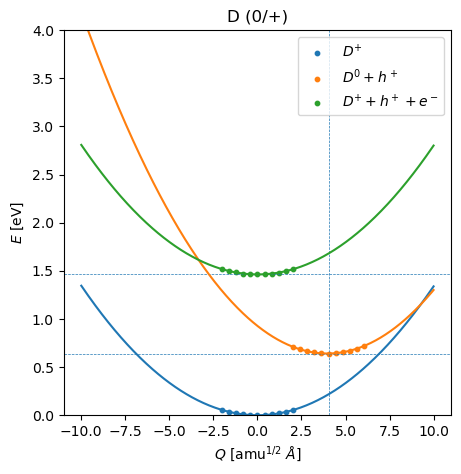

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.axvline(x=dQ,ls='--',lw=0.5)
plt.axhline(y=0, ls='--',lw=0.5)
plt.axhline(y=dE,ls='--',lw=0.5)
plt.axhline(y=Eg,ls='--',lw=0.5)

ax.scatter(Q_ground,  E_ground,  s=10, label=r"$D^{+}$")
ax.scatter(Q_excited, E_excited, s=10, label=r"$D^{0}+h^+$")

# by passing in the axis object, it also plots the fitted curve
q = np.linspace(-10, 10, 500)
ground_omega  = get_omega_from_PES(Q_ground,  E_ground,  ax=ax, q=q)
excited_omega = get_omega_from_PES(Q_excited, E_excited, ax=ax, q=q)

# shift up ground by band gap
E_ground_shift = E_ground + Eg
ax.scatter(Q_ground, E_ground_shift, s=10, label=r"$D^{+}+h^++e^-$")
ground_shift_omega = get_omega_from_PES(Q_ground,  E_ground_shift,  ax=ax, q=q)
# end shift up ground by band gap

ax.set_xlabel('$Q$ [amu$^{1/2}$ $\AA$]')
ax.set_ylabel('$E$ [eV]')
ax.set_title(r"D (0/+)")
ax.set_ylim(0,4)
plt.legend()

plt.show()

## e-ph (from -0.1_0.1_11)

In [6]:
from nonrad.ccd import get_Q_from_struct
from nonrad.elphon import get_Wif_from_WSWQ

# this generates a list of tuples where the first value of the tuple is a Q value
# and the second is the path to the WSWQ file that corresponds to that tuple
WSWQs = []

for label in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']:
    d = str(cc_dir / 'excited' / label)
    pd = Path(d)
    # Q = get_Q_from_struct(ground_struct, excited_struct, str(pd / 'POSCAR'),nround=2)
    Q = get_Q_from_struct(excited_struct, ground_struct, str(pd / 'POSCAR'),nround=2)
    path_wswq = str(pd / 'eph' / 'WSWQ')
    WSWQs.append((Q, path_wswq))

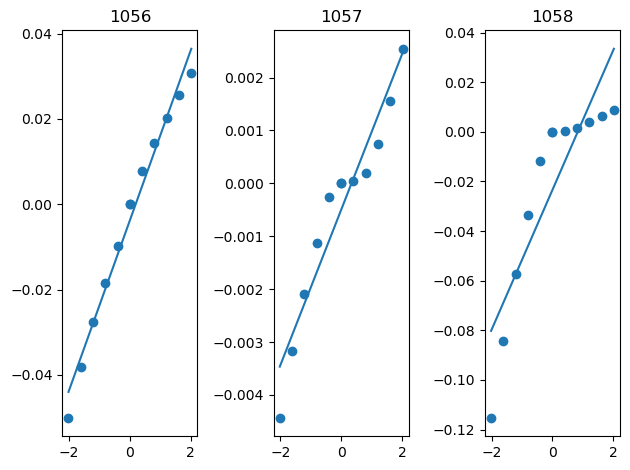

In [9]:
# by passing a figure object, we can inspect the resulting plots
fig = plt.figure()

d   = str(cc_dir / 'excited' / '5')    
mid = Path(d)

Wifs_p = get_Wif_from_WSWQ(wswqs=WSWQs, \
                           initial_vasprun=str(mid / 'vasprun.xml'), \
                           def_index=1059, \
                           bulk_index=[1056,1057,1058], \
                           spin=0, \
                           fig=fig)

plt.tight_layout()
plt.show()

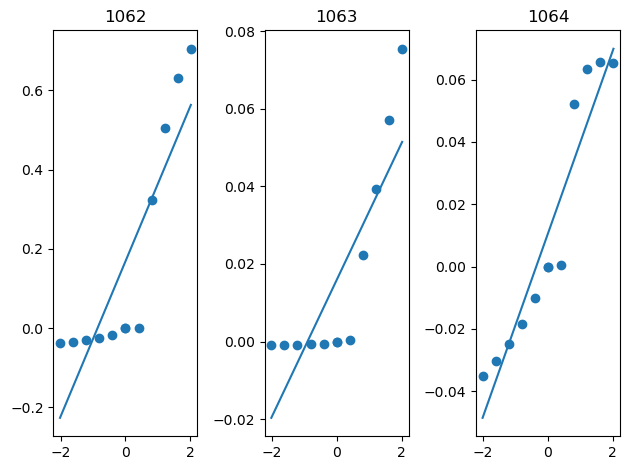

In [10]:
# by passing a figure object, we can inspect the resulting plots
fig = plt.figure()

d   = str(cc_dir / 'excited' / '5')    
mid = Path(d)

Wifs_n = get_Wif_from_WSWQ(wswqs=WSWQs, \
                           initial_vasprun=str(mid / 'vasprun.xml'), \
                           def_index=1059, \
                           bulk_index=[1062,1063,1064], \
                           spin=1, \
                           fig=fig)

plt.tight_layout()
plt.show()